In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

plt.style.use('ggplot')

In [2]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y = y.reshape(y.shape[0], 1)

dims = X.shape, y.shape
print(f'Dimensions of X and y: {dims}')

Dimensions of X and y: ((100, 2), (100, 1))


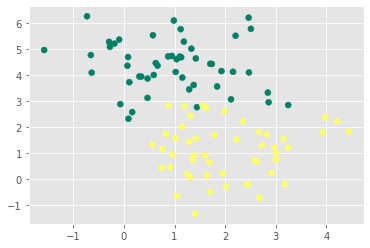

In [3]:
plt.scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    cmap='summer',
)

In [4]:
# inistialization of Weights and bias
def initialize(x):
  W = np.random.randn(X.shape[1], 1)
  b = np.random.randn(1)

  return W, b

In [5]:
W, b = initialize(X)
W.shape, b.shape

((2, 1), (1,))

In [6]:
# model
def model(X, W, b):
  Z = X.dot(W) + b
  A = 1 / (1 + np.exp(-Z))

  return A


In [7]:
A = model(X,W,b)
A

array([[0.44007135],
       [0.72942518],
       [0.79330858],
       [0.77874181],
       [0.532575  ],
       [0.68116723],
       [0.70872984],
       [0.46108903],
       [0.74048881],
       [0.70493023],
       [0.73624467],
       [0.66942758],
       [0.69227213],
       [0.77408847],
       [0.65733929],
       [0.42207965],
       [0.54390826],
       [0.76007173],
       [0.74140983],
       [0.69809144],
       [0.69849058],
       [0.7339974 ],
       [0.6922072 ],
       [0.78769405],
       [0.59391611],
       [0.71776214],
       [0.70095646],
       [0.70456535],
       [0.67609439],
       [0.60753697],
       [0.6104041 ],
       [0.70547657],
       [0.72469709],
       [0.60868554],
       [0.66702055],
       [0.61713432],
       [0.69252609],
       [0.63730447],
       [0.62464289],
       [0.75063484],
       [0.7870803 ],
       [0.57963351],
       [0.81610784],
       [0.68307763],
       [0.72338575],
       [0.62159066],
       [0.64593315],
       [0.672

In [8]:
A.shape

(100, 1)

In [9]:
#  cost function
def log_loss(A, y):
  return -1 * 1/len(y) * np.sum(y * np.log(A) - (1-y) * np.log(1-A))

In [10]:
log_loss(A,y)

-0.40034844956347876

In [11]:
# gradient descent
def gradients(A, X, y):
  dw = 1/len(y) * np.dot(X.T, A-y)
  db = 1/len(y) * np.sum(A-y)
  return dw, db

In [12]:
dw, db = gradients(A, X, y)

dw.shape, db.shape

((2, 1), ())

In [13]:
# update of errors minimization
def update(dw, db, w, b, lr):
  w = w - lr * dw
  b = b - lr * db
  return w, b

In [14]:
# prediction
def predict(x, w, b):
  A = model(x, w, b)
  return A >= .5

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
# Preceptron
def artificial_nn(X, y, lr=1.e-4, n_iter=300):
  loss = []
  # initialize W, b
  W, b = initialize(X)

  for i in range(n_iter):
        A = model(X, W, b)
        loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, lr)
  
  y_pred = predict(X, W, b)
  print(f'Acuuracy: {accuracy_score(y, y_pred)}')

  plt.plot(loss)
  plt.show()

Acuuracy: 0.31


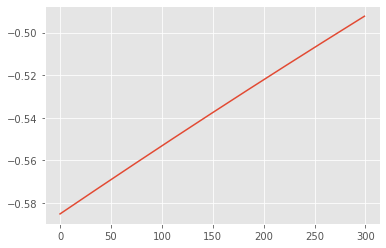

In [17]:
artificial_nn(X, y)

Acuuracy: 0.2


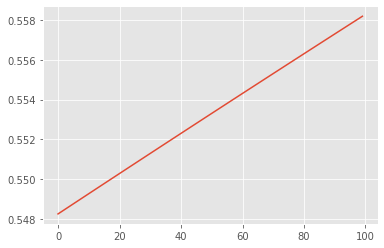

In [18]:
artificial_nn(X, y, n_iter=100)

Acuuracy: 0.89


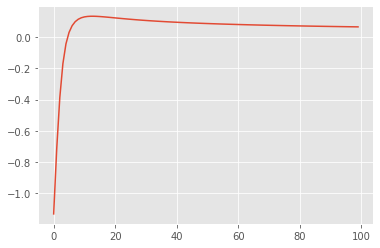

In [19]:
artificial_nn(X, y, lr=0.1, n_iter=100)

Acuuracy: 0.92


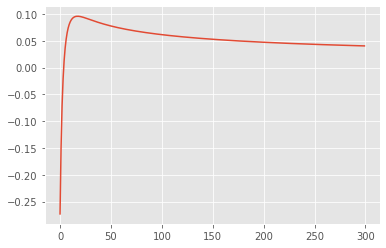

In [20]:
artificial_nn(X, y, lr=0.1, n_iter=300)